In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

import tensorflow as tf

from keras.utils import plot_model

In [2]:
from google.colab import drive

drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [3]:
data_path = r"/content/gdrive/MyDrive/self-driving-car-v2-data/balanced_data.npy"
data = np.load(data_path, allow_pickle = True)

In [4]:
train = data[:-4000]
test = data[-4000:]

In [5]:
X_train = np.array([i[0] for i in train]).reshape(-1,160,128,1)
Y_train = np.asarray([i[1] for i in train])

In [6]:
X_train[0].shape

(160, 128, 1)

In [7]:
Y_train

array([[1, 0, 0, 0],
       [0, 1, 0, 0],
       [0, 1, 0, 0],
       ...,
       [1, 0, 0, 0],
       [0, 0, 0, 1],
       [1, 0, 0, 0]])

In [8]:
X_val = np.array([i[0] for i in test]).reshape(-1,160,128,1)
Y_val = np.asarray([i[1] for i in test])

In [12]:
def BaselineModel1(model_name):
    inputs = keras.Input(shape = (160, 128, 1))

    x = Conv2D(filters = 32, kernel_size = 3, activation = "relu")(inputs)
    x = MaxPooling2D(pool_size = 2)(x)

    x = Conv2D(filters = 64, kernel_size = 3, activation = "relu")(x)
    x = MaxPooling2D(pool_size = 2)(x)

    x = Conv2D(filters = 128, kernel_size = 3, activation = "relu")(x)
    x = MaxPooling2D(pool_size = 2)(x)

    x = Flatten()(x)

    outputs = Dense(4, activation = "relu")(x)

    model = keras.Model(name = model_name, inputs = inputs, outputs = outputs)

    model.compile(
      loss = "categorical_crossentropy",
      optimizer = "adam",
      metrics = ["accuracy"]
      )

    return model

In [21]:
def GetPlot(trained_model,no_epochs):
      accuracy=trained_model.history['accuracy']
      loss=trained_model.history['loss']
      val_accuracy=trained_model.history['val_accuracy']
      val_loss=trained_model.history['val_loss']
      epochs=[i for i in range(1,no_epochs+1)]

      plt.figure(figsize=(12,8))
      plt.plot(epochs,accuracy,'r',label='Training')
      plt.plot(epochs,val_accuracy,'--',label='Validation')
      plt.legend()
      plt.xlabel('Epochs')
      plt.ylabel('Accuracy')
      plt.title('Accuracy',fontsize=15)
      plt.grid()
      plt.show()

      plt.figure(figsize=(12,8))
      plt.plot(epochs,loss,'r',label='Training')
      plt.plot(epochs,val_loss,'--',label='Validation')
      plt.legend()
      plt.title('Loss',fontsize=15)
      plt.xlabel('Epochs')
      plt.ylabel('Loss')
      plt.grid()
      plt.show()

In [13]:
baseline_model_v1 = BaselineModel1("Baseline_Model_v1")
baseline_model_v1.summary()

Model: "Baseline_Model_v1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 160, 128, 1)]     0         
                                                                 
 conv2d (Conv2D)             (None, 158, 126, 32)      320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 79, 63, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 77, 61, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 38, 30, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 36, 28, 128) 

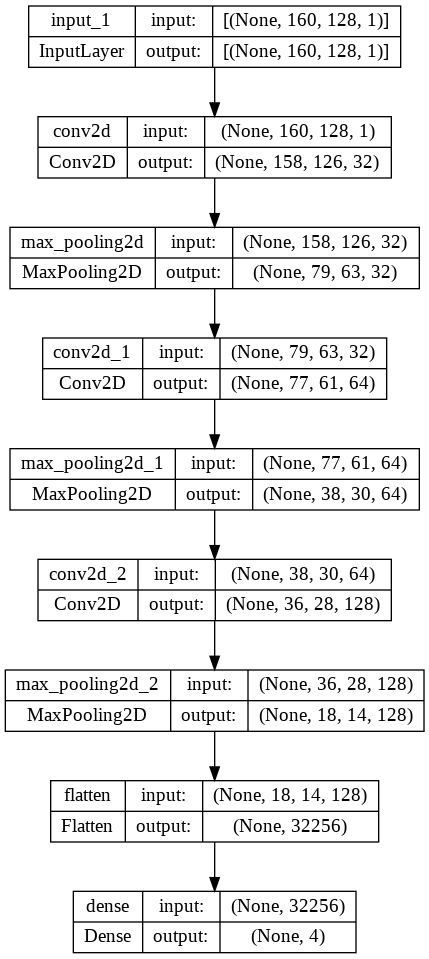

In [23]:
keras.utils.plot_model(baseline_model_v1, show_shapes = True, show_layer_names = True)

In [20]:
baseline_v1_history = baseline_model_v1.fit(
                          X_train,Y_train,
                          epochs = 10,
                          batch_size = 32,
                          validation_data = (X_val, Y_val),
                          verbose = 1
                          )

Epoch 1/10
623/623 [==============================] - 24s 25ms/step - loss: nan - accuracy: 0.2941 - val_loss: nan - val_accuracy: 0.3027
Epoch 2/10
623/623 [==============================] - 15s 24ms/step - loss: nan - accuracy: 0.2941 - val_loss: nan - val_accuracy: 0.3027
Epoch 3/10
623/623 [==============================] - 13s 21ms/step - loss: nan - accuracy: 0.2941 - val_loss: nan - val_accuracy: 0.3027
Epoch 4/10
623/623 [==============================] - 13s 21ms/step - loss: nan - accuracy: 0.2941 - val_loss: nan - val_accuracy: 0.3027
Epoch 5/10
623/623 [==============================] - 13s 21ms/step - loss: nan - accuracy: 0.2941 - val_loss: nan - val_accuracy: 0.3027
Epoch 6/10
623/623 [==============================] - 14s 22ms/step - loss: nan - accuracy: 0.2941 - val_loss: nan - val_accuracy: 0.3027
Epoch 7/10
623/623 [==============================] - 13s 21ms/step - loss: nan - accuracy: 0.2941 - val_loss: nan - val_accuracy: 0.3027
Epoch 8/10
623/623 [==============

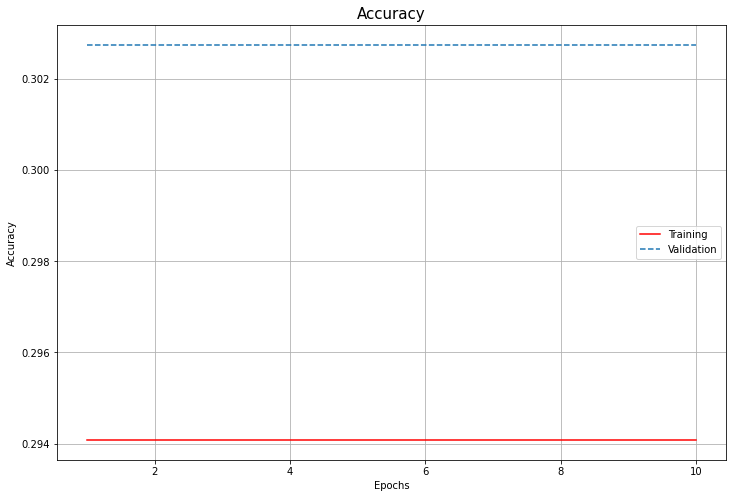

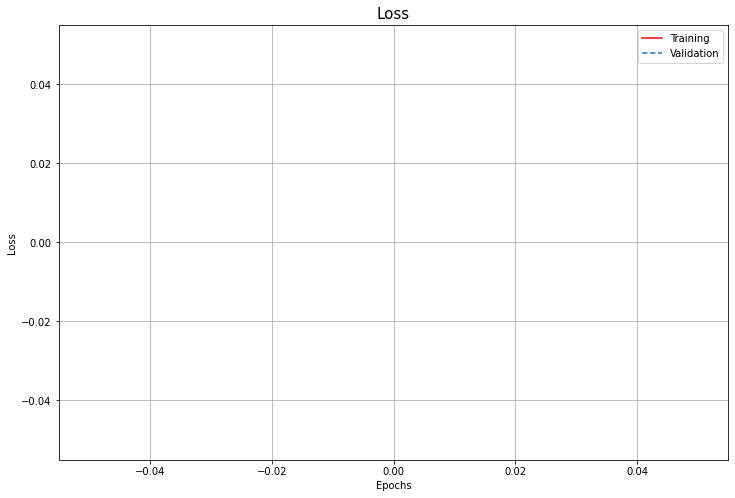

In [24]:
GetPlot(baseline_v1_history, 10)

In [15]:
def BaselineModel2(model_name):
    inputs = keras.Input(shape = (160, 128, 1))

    x = Conv2D(filters = 32, kernel_size = 3, activation = "relu")(inputs)
    x = MaxPooling2D(pool_size = 2)(x)

    x = Conv2D(filters = 64, kernel_size = 3, activation = "relu")(x)
    x = MaxPooling2D(pool_size = 2)(x)

    x = Conv2D(filters = 128, kernel_size = 3, activation = "relu")(x)
    x = MaxPooling2D(pool_size = 2)(x)

    x = Conv2D(filters = 256, kernel_size = 3, activation = "relu")(x)
    x = MaxPooling2D(pool_size = 2)(x)

    x = Conv2D(filters = 256, kernel_size = 3, activation = "relu")(x)
    x = MaxPooling2D(pool_size = 2)(x)

    x = Flatten()(x)

    outputs = Dense(4, activation = "relu")(x)

    model = keras.Model(name = model_name, inputs = inputs, outputs = outputs)

    model.compile(
      loss = "categorical_crossentropy",
      optimizer = "adam",
      metrics = ["accuracy"]
      )

    return model

In [16]:
baseline_model_v2 = BaselineModel2("Baseline_model_v2")
baseline_model_v2.summary()

Model: "Baseline_model_v2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 160, 128, 1)]     0         
                                                                 
 conv2d_3 (Conv2D)           (None, 158, 126, 32)      320       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 79, 63, 32)       0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 77, 61, 64)        18496     
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 38, 30, 64)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 36, 28, 128) 

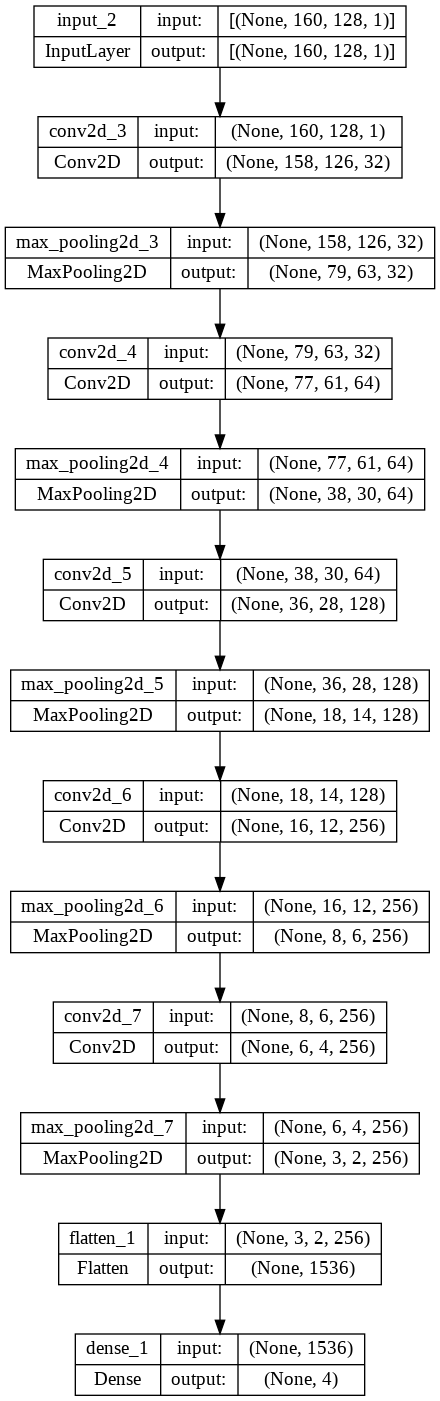

In [25]:
keras.utils.plot_model(baseline_model_v2, show_shapes = True, show_layer_names = True)

In [10]:
from tensorflow.keras.applications.xception import Xception
from tensorflow.keras.applications.xception import preprocess_input

In [17]:
def CustomXception(model_name):
    
    input_shape = (160,128,1)
    inputs = keras.Input(shape = (160,128,1))
    xception_base = Xception(weights=None, include_top=False, input_shape = input_shape)

    x = preprocess_input(inputs)
    x = xception_base(x)
    x = Flatten()(x)

    outputs = Dense(4, activation = "softmax")(x)

    xception_model = keras.Model(name = "CustomXception",inputs = inputs, outputs = outputs)

    xception_model.compile(
        loss = "categorical_crossentropy",
        optimizer = "Adam",
        metrics = ["accuracy"]
    )

    return xception_model

In [18]:
custom_model = CustomXception("CustomXception")
custom_model.summary()

Model: "CustomXception"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 160, 128, 1)]     0         
                                                                 
 tf.math.truediv (TFOpLambda  (None, 160, 128, 1)      0         
 )                                                               
                                                                 
 tf.math.subtract (TFOpLambd  (None, 160, 128, 1)      0         
 a)                                                              
                                                                 
 xception (Functional)       (None, 5, 4, 2048)        20860904  
                                                                 
 flatten_2 (Flatten)         (None, 40960)             0         
                                                                 
 dense_2 (Dense)             (None, 4)              

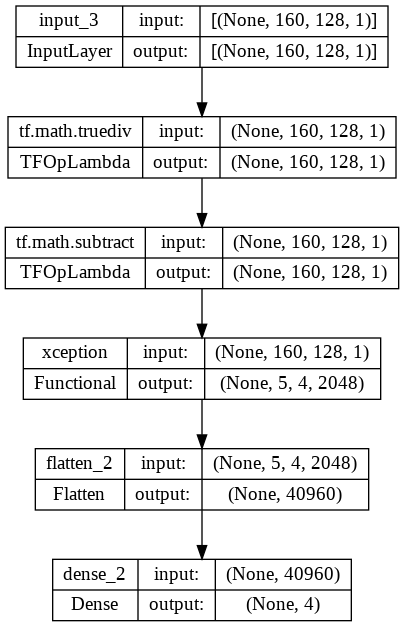

In [26]:
keras.utils.plot_model(custom_model, show_shapes = True, show_layer_names = True)

In [27]:
checkpoint_filepath = '/content/checkpoint/'

checkpoint = keras.callbacks.ModelCheckpoint('/content/checkpoint/model1{epoch:08d}.h5', period=5) 

'''
model_checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(
    filepath=checkpoint_filepath,
    save_weights_only=True,
    monitor='val_accuracy',
    mode='max',
    save_best_only=True)
'''

#es = tf.keras.callbacks.EarlyStopping(monitor='val_accuracy', mode='min', verbose=1, patience=5)

"\nmodel_checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(\n    filepath=checkpoint_filepath,\n    save_weights_only=True,\n    monitor='val_accuracy',\n    mode='max',\n    save_best_only=True)\n"

In [28]:
history_xception = custom_model.fit(
    X_train,Y_train,
    epochs = 12,
    batch_size = 32,
    validation_data = (X_val, Y_val),
    verbose = 1,
    callbacks=[checkpoint]
)

Epoch 1/12


KeyboardInterrupt: ignored